# Final - Problem 2 (Subgradient Method)

Consider the following functions:
$$f_1(x,y)=|x-y+5|, (x,y)\in \mathbb{R}^2.$$
$$f_2(x,y)=|x+y+1|, (x,y)\in \mathbb{R}^2.$$
$$f=f_1+f_2$$
- (c) Write a Python function to find a subgradient of} $f$ at $(x,y)$.
- (d) Use the subgradient method to find an absolute minimizer of the function $f$.

In [2]:
import numpy as np

(2c) Python function that finds the subgradient of $f$ at $(x,y)$.

In [13]:
def subf1(x,y):
    if x-y+5>0:
        return np.array([1,-1])
    elif x-y+5<0:
        return np.array([-1,1])
    else:
        return np.array([0,0])
    
def subf2(x,y):
    if x+y+1>0:
        return np.array([1,1])
    elif x+y+1<0:
        return np.array([-1,-1])
    else:
        return np.array([0,0])

def subf(x,y):
    return subf1(x,y) + subf2(x,y)

(2d) Python code implementing the subgradient method to find the absolute minimizer of the function $f$.

In [22]:
def f(x, y):
    return abs(x - y + 5) + abs(x + y + 1)

def subgradient_method(initial_point, step_size, max_iter=100000, tol=1e-6):
    x, y = initial_point
    for k in range(max_iter):
        grad = subf(x, y)
        x_new = x - step_size * grad[0]
        y_new = y - step_size * grad[1]
        if np.linalg.norm([x_new - x, y_new - y]) < tol:
            print(f"Converged in {k+1} iterations.")
            return x_new, y_new
        x, y = x_new, y_new
    print("Initial point used:", initial_point)    
    print("Maximum number of iterations reached.")
    return x, y

# Parameters for the subgradient method
initial_point = (3, 7)
step_size = 0.01

# Find the minimizer
minimizer = subgradient_method(initial_point, step_size)
print("Minimizer:", minimizer)
print("Minimum value of f:", f(minimizer[0], minimizer[1]))

Initial point used: (3, 7)
Maximum number of iterations reached.
Minimizer: (-3.0000000000000044, 2.000000000000062)
Minimum value of f: 1.2434497875801753e-13


# Final - Problem 3 (Sylvester Smallest Enclosing Ball)

Given $m$ points $a_1,a_2,\dots,a_m\in\mathbb{R}^n,$ define the function $$f(x)=\max\{||x-a_1||^2,||x-a_2||^2,\dots,||x-a_m||^2\}, x\in \mathbb{R}^n.$$ To find the smallest ball that encloses all of the given points, we can solve the following optimization problem: $$\textrm{minimize }f(x), \ x\in\mathbb{R}^n.$$ This problem is known as the Sylvester smallest enclosing ball problem. If $x_0$ is an optimal solution to the problem and $r=f(x_0),$ then the ball with center $x_0$ and radius $r$ is the ball we are looking for.

Use the subgradient method and the model above to find the smallest circle that encloses the following points in $\mathbb{R}^2.$

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Data set (10 points) in R^2:
[[ 1.3  2.4]
 [-0.7  3.1]
 [ 2.8 -1.5]
 [-2.9  0.6]
 [ 1.7 -2.8]
 [-1.4 -3.2]
 [ 3.3  1.1]
 [-3.7 -0.9]
 [ 0.9  3.7]
 [-2.2  2.3]]


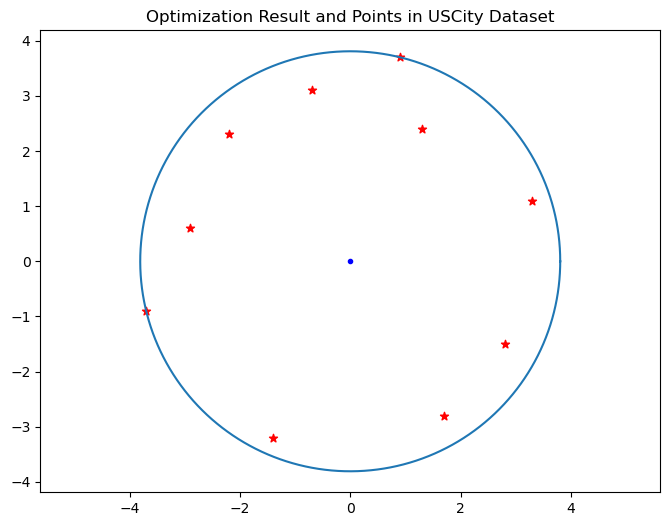

Optimized point z (center): [0 0], Minimized maximum distance V: 3.8078865529319543


In [34]:
def f_value (B,x):
    max_distance = np.linalg.norm(x-B[0,:])
    n = B.shape[0]
    
    for i in range(n):
        distance = np.linalg.norm(x-B[i,:])
        max_distance = max(max_distance, distance)
    return max_distance

def sub_d(B,x):
    n = B.shape[0]
    W = np.zeros(n)
    for l in range(n):
        W[l] = np.linalg.norm(x-B[1,:])
    p = np.argmax(W)
    if W[p] == 0:
        z = 0
    else:
        z = (x-B[p,:])/np.linalg.norm(x-B[p,:])
    return z

def draw_disk(center, r):
    t = np.linspace(0, 2*np.pi, 1000)
    x = r * np.cos(t) + center[0]
    y = r * np.sin(t) + center[1]
    plt.figure(figsize=(8, 6))
    plt.plot(x,y)
    plt.axis('equal')
    
def main():
    df = pd.read_excel('R2data.xlsx')
    data = df.to_numpy() 
    A = []
    for row in data:
        array = np.array([row[0], row[1]])
        A.append(array)
    A = np.array(A)
    print(f"Data set (10 points) in R^2:")
    print(A)
    x = np.array([0, 0])
    K = 5000
    V = f_value(A, x)
    z = x.copy()
    for i in range(K):
        x = x - 0.01 * sub_d(A, x)
        if f_value(A, x) <= V:
            V = f_value(A, x)
            z = x.copy()
    draw_disk(z, V)
    plt.scatter(A[:, 0], A[:, 1], c='r', marker='*')
    plt.scatter(z[0], z[1], c='b', marker='.')
    plt.title("Optimization Result and Points in USCity Dataset")
    plt.show()
    print(f"Optimized point z (center): {z}, Minimized maximum distance V: {V}")

if __name__ == "__main__":
    main()


# Final - Problem 6 (SVM/Kernel Method)

Use the data "twomoonsdataset.txt" to do the following:

(6a) Please write Python program for SVM binary classification using this dataset.
Your MATLAB/Python program should perform the following tasks: Split the dataset into training
data (80\% of the dataset) and test data (20\% of the dataset); Use the training data to find the
separating hyperplane determined by w; Use the test data to evaluate and show the accuracy of
your method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Maximum number of iterations reached.
Accuracy: 80.0 %
Hyperplane equation: ⟨ [ 0.61956435 -0.8615785 ] , x⟩ + -0.06916666666666743 = 0


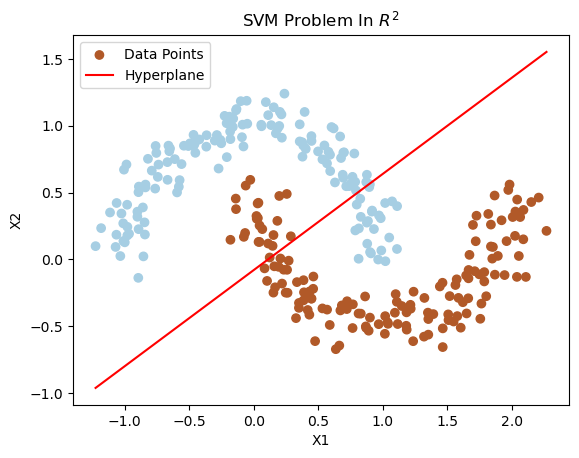

In [343]:
# Load dataset
data = np.loadtxt("twomoonsdataset.txt")

# Separate features and labels
X = data[:, 0:2]  # features are all columns except the last
y = data[:, 2]  # label is in the last column

num_data = X.shape[0]  # number of data points
n = 2  # number of features

# Define train-test split ratio
train_ratio = 0.80
test_ratio = 0.20

# Calculate number of samples for training and testing
num_samples = X.shape[0]
num_train_samples = int(train_ratio * num_samples)
num_test_samples = num_samples - num_train_samples

# Shuffle the dataset and split into training and testing sets
indices = np.random.permutation(num_samples)
train_indices = indices[:num_train_samples]
test_indices = indices[num_train_samples:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

num_data_train = X_train.shape[0]  # number of data points in training set

# Subgradient method
def subgradient_method(X, y, n, num_data, tol, maxiter, alpha, C):
    # Initialize w and b for defining the hyperplane
    iteration = 0
    w = np.ones(n)
    b = 1
    sgw = np.ones(n)
    sgb = 1

    def subgradient(w, b, X, y, n, num_data_train):
        sgw = np.zeros(n)
        sgb = 0

        for i in range(num_data_train):
            margin = y[i] * (np.dot(X[i], w) + b)  # Compute margin

            if margin < 1:  # Compare margin with 1
                sgw += (-1) * y[i] * X[i]
                sgb += (-1) * y[i]

        return sgw, sgb

    while iteration < maxiter:
        if np.linalg.norm(sgw) < tol and np.linalg.norm(sgb) < tol:
            break
        else:
            sgw, sgb = subgradient(w, b, X, y, n, num_data_train)
            w -= alpha * (w + (C / num_data_train) * sgw)
            b -= alpha * (C / num_data_train) * sgb
            iteration += 1

        if iteration == maxiter:
            print("Maximum number of iterations reached.")
    return w, b

# Run subgradient method on training data
w, b = subgradient_method(X_train, y_train, n, num_data_train, tol=1e-8, maxiter=1000, alpha=0.01, C=4)

# Compute predictions
predictions = np.sign(np.dot(X_test, w) + b)

# Compute accuracy
correct_predictions = np.sum(predictions == y_test)
accuracy = correct_predictions / len(y_test)
print("Accuracy:", accuracy * 100, "%")

# Print the hyperplane equation
print("Hyperplane equation: ⟨", w, ",", "x⟩ +", b, "= 0")

# Plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label="Data Points")

# Plot the hyperplane
x_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_plot = (-w[0] * x_plot - b) / w[1]
plt.plot(x_plot, y_plot, '-r', label="Hyperplane")

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM Problem In $R^2$")
plt.legend()
plt.show()

(6b) Improve the accuracy of your method using the kernel method.

In [89]:
from cvxopt import matrix, solvers

In [342]:
# Load dataset
data = np.loadtxt("twomoonsdataset.txt")

# Separate features and labels
X = data[:, 0:2]  # features are all columns except the last
y = data[:, 2]  # label is in the last column

# Define train-test split ratio
train_ratio = 0.80
test_ratio = 0.20

# Calculate number of samples for training and testing
num_samples = X.shape[0]
num_train_samples = int(train_ratio * num_samples)
num_test_samples = num_samples - num_train_samples

# Shuffle the dataset and split into training and testing sets
indices = np.random.permutation(num_samples)
train_indices = indices[:num_train_samples]
test_indices = indices[num_train_samples:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# dimensions
m, n = X_train.shape

# Regularization parameter
C = 4.0  

# Kernel function (RBF kernel)
def rbf_kernel(X, Y, gamma=0.5):
    K = np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - Y[np.newaxis, :], axis=2) ** 2)
    return K

# Number of training samples
m, n = X_train.shape

# Regularization parameter
C = 4.0  # You can adjust this parameter

# Construct the matrices for the quadratic programming problem using the RBF kernel
K_train = rbf_kernel(X_train, X_train)
P = matrix(np.outer(y_train, y_train) * K_train)
q = matrix(-np.ones(m))
G = matrix(np.vstack((-np.eye(m), np.eye(m))))
h = matrix(np.hstack((np.zeros(m), np.ones(m) * C / m)))
A = matrix(y_train, (1, m), 'd')
b = matrix(0.0)

# Solve the quadratic programming problem
solution = solvers.qp(P, q, G, h, A, b)
lambdas = np.array(solution['x']).flatten()

# Print the optimal lambda values
#print("Optimal lambda values:", lambdas)

# Support vectors have non-zero Lagrange multipliers
support_vectors = np.where(lambdas > 1e-5)[0]

# Compute the bias term b*
b = np.mean([y_train[i] - np.sum(lambdas * y_train * K_train[:, i]) for i in support_vectors])

# Predict function using the kernel
def predict(X_train, y_train, X_test, lambdas, b, kernel, gamma=0.5):
    K_test = kernel(X_train, X_test, gamma)
    y_pred = np.sign(np.sum((lambdas * y_train)[:, np.newaxis] * K_test, axis=0) + b)
    return y_pred

# Predict the class labels for the test data
y_pred = predict(X_train, y_train, X_test, lambdas, b, rbf_kernel)

# Calculate the prediction accuracy
accuracy = np.mean(y_pred == y_test) * 100
print(f"Prediction accuracy: {accuracy:.2f}%")

     pcost       dcost       gap    pres   dres
 0: -2.4261e+01 -1.3290e+01  1e+03  4e+01  9e-16
 1: -7.9175e+00 -9.7245e+00  7e+01  2e+00  9e-16
 2: -2.7545e+00 -7.6779e+00  5e+00  2e-16  3e-15
 3: -2.9317e+00 -3.3578e+00  4e-01  5e-17  1e-15
 4: -3.0783e+00 -3.1038e+00  3e-02  5e-17  9e-16
 5: -3.0962e+00 -3.0967e+00  5e-04  6e-17  9e-16
 6: -3.0967e+00 -3.0967e+00  5e-06  1e-16  9e-16
 7: -3.0967e+00 -3.0967e+00  5e-08  1e-16  1e-15
Optimal solution found.
Prediction accuracy: 91.67%


# Final - Problem 7 (Logistic Regression/SVM)

The Pima Indians Diabetes dataset contains 768 instances and 9 attributes used
to predict diabetes in female patients of Pima Indian heritage: Pregnancies (number of timespregnant), Glucose (plasma glucose concentration after 2 hours in an oral glucose tolerance test), BloodPressure (diastolic blood pressure in mm Hg), SkinThickness (triceps skinfold thickness in mm), Insulin (2-hour serum insulin in mu U/ml), BMI (body mass index in kg/m2), Diabetes PedigreeFunction (score indicating likelihood of diabetes based on family history), Age (years), and Outcome (diabetes diagnosis: 0 or 1). This dataset is widely used for binary classification
tasks in machine learning. The dataset can be downloaded from Canvas. Use 80\% of the dataset for training and 20\% of the dataset for testing.

(7a) Use the training data to write a Python code based on logistic regression to predict if a person has diabetes. Show the accuracy of your prediction using the testing data.

In [356]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [419]:
# Load the dataset
data = np.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# Extract features and labels
X = data[:, :-1]  # Features are all columns except the last
y = data[:, -1]   # Label is in the last column

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones to X for the bias term
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Define train-test split ratio
train_ratio = 0.80

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=train_ratio)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss function
def compute_loss(X, y, weights):
    z = np.dot(X, weights)
    loss = -np.mean(y * np.log(sigmoid(z)) + (1 - y) * np.log(1 - sigmoid(z)))
    return loss

# Define the gradient of the loss function
def compute_gradient(X, y, weights):
    z = np.dot(X, weights)
    gradient = np.dot(X.T, sigmoid(z) - y) / y.size
    return gradient

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Set the learning rate, maximum iterations, and tolerance
learning_rate = 0.01
max_iter = 100000
tol = 1e-7

# Perform gradient descent with stopping criteria
for i in range(max_iter):
    gradient = compute_gradient(X_train, y_train, weights)
    weights -= learning_rate * gradient
    
    # Check for convergence
    if np.linalg.norm(gradient) < tol:
        print(f"Convergence reached at iteration {i}")
        break
else:
    print("Maximum iterations reached without convergence")
    
print("Optimal weights (and last one is bias term):", weights)

# Predict function using the trained weights
def predict(X, weights):
    z = np.dot(X, weights)
    return (sigmoid(z) >= 0.5).astype(int)

# Predict the class labels for the test data
y_pred = predict(X_test, weights)

# Calculate the prediction accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Prediction accuracy: {accuracy:.2f}%")

Convergence reached at iteration 19368
Optimal weights (and last one is bias term): [-0.77426242  0.41537131  1.06568053 -0.2262815   0.05631008 -0.18063755
  0.68320635  0.32303512  0.12487899]
Prediction accuracy: 85.06%


(7b) Repeat the same question in part (a) using support vector machine.

In [444]:
# Load the dataset
data = np.loadtxt("pima-indians-diabetes.data.csv", delimiter=",")

# Extract features and labels
X = data[:, :-1]  # Features are all columns except the last
y = data[:, -1]   # Label is in the last column

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Change entries in y to -1 if they are 0
y[y == 0] = -1

num_data = X.shape[0]  # number of data points
n = 8  # number of features

# Define train-test split ratio
train_ratio = 0.80
test_ratio = 0.20

# Calculate number of samples for training and testing
num_samples = X.shape[0]
num_train_samples = int(train_ratio * num_samples)
num_test_samples = num_samples - num_train_samples

# Shuffle the dataset and split into training and testing sets
indices = np.random.permutation(num_samples)
train_indices = indices[:num_train_samples]
test_indices = indices[num_train_samples:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

num_data_train = X_train.shape[0]  # number of data points in training set

# Subgradient method
def subgradient_method(X, y, n, num_data, tol, maxiter, alpha, C):
    # Initialize w and b for defining the hyperplane
    iteration = 0
    w = np.ones(n)
    b = 1
    sgw = np.ones(n)
    sgb = 1

    def subgradient(w, b, X, y, n, num_data_train):
        sgw = np.zeros(n)
        sgb = 0

        for i in range(num_data_train):
            margin = y[i] * (np.dot(X[i], w) + b)  # Compute margin

            if margin < 1:  # Compare margin with 1
                sgw += (-1) * y[i] * X[i]
                sgb += (-1) * y[i]

        return sgw, sgb

    while iteration < maxiter:
        if np.linalg.norm(sgw) < tol and np.linalg.norm(sgb) < tol:
            break
        else:
            sgw, sgb = subgradient(w, b, X, y, n, num_data_train)
            w -= alpha * (w + (C / num_data_train) * sgw)
            b -= alpha * (C / num_data_train) * sgb
            iteration += 1

        if iteration == maxiter:
            print("Maximum number of iterations reached.")
    return w, b

# Run subgradient method on training data
w, b = subgradient_method(X_train, y_train, n, num_data_train, tol=1e-8, maxiter=50000, alpha=0.01, C=4)

# Compute predictions
predictions = np.sign(np.dot(X_test, w) + b)

# Compute accuracy
correct_predictions = np.sum(predictions == y_test)
accuracy = correct_predictions / len(y_test)
print("Accuracy:", accuracy * 100, "%")

Maximum number of iterations reached.
Accuracy: 76.62337662337663 %


# Final - Problem 8 (SVM R^3)

Write a Matlab or Python program to determine a hyperplane with the largest margin that separates the points with label 1 and the points with label −1 in the data provided

In [458]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Maximum iterations (1000000) reached without convergence.
Hyperplane equation: w = [ 0.   0.1 -0.5] , b = 0.0


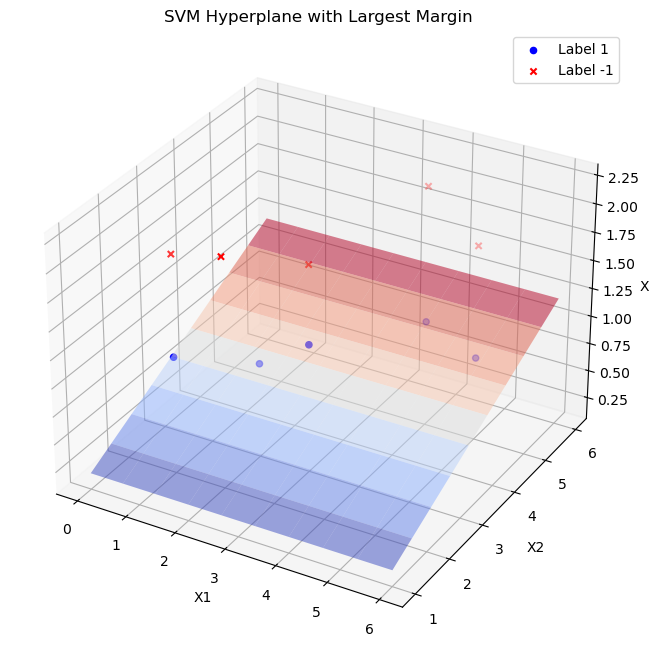

In [473]:
# Define the dataset
data = np.array([[1, 2, 1.1, 1],
                 [2, 3, 0.9, 1],
                 [3, 3, 1.2, 1],
                 [4, 5, 1.0, 1],
                 [5, 5, 0.8, 1],
                 [1, 2, 2.0, -1],
                 [2, 2, 2.1, -1],
                 [3, 3, 1.9, -1],
                 [4, 5, 2.2, -1],
                 [5, 5, 1.8, -1]])

# Separate features (X) and labels (y)
X = data[:, 0:3]  # features are the first three columns
y = data[:, 3]    # labels are in the last column

# SVM using subgradient method with tolerance and max_iter check
def svm_fit_subgradient(X, y, alpha=0.001, C=1.0, max_iter=1000000, tol=1e-4):
    num_samples, num_features = X.shape
    
    # Initialize w and b
    w = np.zeros(num_features)
    b = 0
    
    # Subgradient descent
    for epoch in range(max_iter):
        sgw = np.zeros(num_features)
        sgb = 0
        
        for i in range(num_samples):
            margin = y[i] * (np.dot(X[i], w) + b)
            if margin < 1:
                sgw += (-1) * y[i] * X[i]
                sgb += (-1) * y[i]
        
        # Update weights and bias
        w = w - alpha * (w + (C / num_samples) * sgw)
        b = b - alpha * (C / num_samples) * sgb
        
        # Check convergence based on subgradient norm
        if np.linalg.norm(sgw) < tol and np.abs(sgb) < tol:
            return w, b, epoch, True  # Converged
        
    # If max_iter reached without convergence
    return w, b, max_iter, False

# Fit SVM model using subgradient method
w, b, num_iter, converged = svm_fit_subgradient(X, y)

# Print convergence information
if converged:
    print(f"Converged after {num_iter} iterations.")
else:
    print(f"Maximum iterations ({num_iter}) reached without convergence.")

# Print hyperplane parameters
print("Hyperplane equation: w =", w, ", b =", b)

# Plotting the 3D scatter plot with the hyperplane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of points
ax.scatter(X[y==1, 0], X[y==1, 1], X[y==1, 2], c='b', marker='o', label='Label 1')
ax.scatter(X[y==-1, 0], X[y==-1, 1], X[y==-1, 2], c='r', marker='x', label='Label -1')

# Plot the hyperplane w0*x0 + w1*x1 + w2*x2 + b = 0
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1_range = np.linspace(x1_min, x1_max, 10)
x2_range = np.linspace(x2_min, x2_max, 10)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
x3_mesh = (-w[0] * x1_mesh - w[1] * x2_mesh - b) / w[2]

ax.plot_surface(x1_mesh, x2_mesh, x3_mesh, alpha=0.5, cmap='coolwarm')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('SVM Hyperplane with Largest Margin')

ax.legend()
plt.show()

# Final - Problem 10 BONUS (Matrix Completion)

Given the matrix below with three missing entries:
$$M=\begin{bmatrix}
    \textrm{NaN} & 0.38119569 &-0.23319457  & 0.26949725 & -0.23018613 & \textrm{NaN} \\
    -0.21834876 & -0.10610883 & 0.06491155 & -0.07501669 & 0.06407412 & 0.0643938 \\
    1.02283804 & 0.49705868 & -0.30407318 & 0.35140992 & -0.30015033 & -0.30164782 \\
    2.40518827 & 1.16882601 & \textrm{NaN} & 0.82633515 & -0.70579898 & -0.70932032 \\
    -0.36977801 & -0.17969743 & 0.10992901 & -0.12704227 & 0.10851082 & 0.10905219 \\
    -0.36975208 & -0.17968483 & 0.1099213 & -0.12703336 & 0.10850321 & \textrm{NaN}
\end{bmatrix}$$
Use the accelerated proximal gradient method to recover the missing entries by solving the optimization problem
$$\textrm{minimize} f(X)=\frac{1}{2}||P_\Omega (X)-P_\Omega(M)||_{\textrm{fro}}^2+\lambda ||X||_*, X\in \mathbb{R}^{6\times 6}.$$
The purpose is to find a matrix $X$ with rank as small as possible that approximates $P_\Omega(M)$.

In [483]:
def prox_nuclear_norm(X, mu):
    # Perform SVD
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    
    # construct v
    v = np.zeros(len(S))
    for i in range(len(S)):
        if (S[i] < (-1)*mu):
            v[i] = S[i] + mu
        elif (S[i] > mu):
            v[i] = S[i] - mu
        else:
            v[i] = 0
    
    # Reconstruct the matrix 
    return U @ np.diag(v) @ Vt

def proj_omega(X, Omega):
    return X * Omega

def accel_prox_grad(M, Omega, lambda_, t, max_iter=10000, tol=1e-10):
    X = np.zeros_like(M)
    Y = np.zeros_like(M)
    beta = 1
    reached_max_iter = False  # Flag to indicate if max_iter is reached
    
    for k in range(max_iter):
        X_old = X
        # Gradient descent step
        grad = proj_omega(Y, Omega) - M
        Y = Y - t * grad
        
        # Proximal step
        X = prox_nuclear_norm(Y, lambda_ * t)
        
        # Momentum term update
        beta_next = (1 + np.sqrt(1 + 4 * beta**2)) / 2
        Y = X + ((beta - 1) / beta_next) * (X - X_old)
        beta = beta_next
        
        # Check for convergence
        if np.linalg.norm(X - X_old, 'fro') < tol:
            break
        
        # Check if reached max_iter
        if k == max_iter - 1:
            reached_max_iter = True
    
    if reached_max_iter:
        print(f"Reached maximum iterations ({max_iter}) without convergence.")
    
    return X

# Define the matrix M and the mask Omega
M = np.array([
    [np.nan, 0.38119569, -0.23319457, 0.26949725, -0.23018613, np.nan],
    [-0.21834876, -0.10610883, 0.06491155, -0.07501669, 0.06407412, 0.0643938],
    [1.02283804, 0.49705868, -0.30407318, 0.35140992, -0.30015033, -0.30164782],
    [2.40518827, 1.16882601, np.nan, 0.82633515, -0.70579898, -0.70932032],
    [-0.36977801, -0.17969743, 0.10992901, -0.12704227, 0.10851082, 0.10905219],
    [-0.36975208, -0.17968483, 0.1099213, -0.12703336, 0.10850321, np.nan]
])

Omega = ~np.isnan(M)  # Create a binary mask for observed entries
M[np.isnan(M)] = 0  # Replace NaNs with zeros for the computation

# Parameters
lambda_ = 0.1  # Regularization parameter
t = 0.1  # Step size

# Solve the matrix completion problem
completed_matrix = accel_prox_grad(M, Omega, lambda_, t)

print(completed_matrix)

[[ 0.72333015  0.35359271 -0.20103594  0.24998253 -0.21351799 -0.21320143]
 [-0.21250585 -0.10388136  0.05906198 -0.07344191  0.06272906  0.06263606]
 [ 0.99546735  0.48662426 -0.27667133  0.34403301 -0.29384947 -0.29341381]
 [ 2.32948881  1.1387473  -0.64743738  0.80507014 -0.68763587 -0.68661639]
 [-0.35988292 -0.17592516  0.10002265 -0.12437535  0.10623292  0.10607542]
 [-0.35929884 -0.17563964  0.09986032 -0.12417349  0.10606051  0.10590326]]
